In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pickle
%matplotlib inline
pd.options.mode.chained_assignment = None
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import log_loss, make_scorer
from sklearn.cross_validation import StratifiedKFold
from sklearn import metrics

/Users/hoangnguyen/miniconda3/envs/pydata/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# Load data 

In [2]:
with open("preprocessed_data.pkl", "rb") as f:
    train_data = pickle.load(f)
    train_label = pickle.load(f)
    label_list = pickle.load(f)

# Choose parameters 

In [3]:
# Choose parameters for RandomForest
def best_params(train_x, train_y):
    rfc = RandomForestClassifier()
    param_grid = { 
        'n_estimators': [4000, 4500],
        'max_features': ['auto', 'sqrt', 'log2']
    }
    
    CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
    CV_rfc.fit(train_x, train_y)
    return CV_rfc.best_params_

print(best_params(train_data.values, train_label.values))

{'n_estimators': 4500, 'max_features': 'sqrt'}


In [3]:
# RandomForest Classifier 
rf = RandomForestClassifier(n_estimators=4500, max_features='sqrt').fit(train_data, train_label)
importances = rf.feature_importances_

In [4]:
feat_labels = train_data.columns[0:]
feat_labels

Index(['Age', 'Size', 'HasName_0', 'HasName_1', 'TimeofDay_lateday',
       'TimeofDay_midday', 'TimeofDay_morning', 'TimeofDay_night', 'WeekDay_0',
       'WeekDay_1', 'WeekDay_2', 'WeekDay_3', 'WeekDay_4', 'WeekDay_5',
       'WeekDay_6', 'IsIntact_0.0', 'IsIntact_1.0', 'Sex_Female', 'Sex_Male',
       'PureMixHybrid_Hybrid', 'PureMixHybrid_Mix', 'PureMixHybrid_Pure',
       'Group_Herding', 'Group_Hound', 'Group_NonSporting', 'Group_PitBull',
       'Group_Sporting', 'Group_Terrier', 'Group_Toy', 'Group_Unknown',
       'Group_Working', 'IsMixColor_0', 'IsMixColor_1'],
      dtype='object')

In [5]:
#feat_labels[15]

In [6]:
#importances

In [7]:
indices = np.argsort(importances)[::-1]

In [8]:
indices

array([ 0,  1, 15, 16, 32, 31,  4,  8, 20, 11, 12, 18, 17, 10,  5,  9,  2,
       13,  3, 26, 22, 19, 14, 23, 27, 30, 28, 25, 24, 21,  7,  6, 29])

# Accuracy and score

In [9]:
kfold = StratifiedKFold(train_label, n_folds=10, random_state=7)

In [10]:
results = cross_val_score(rf, train_data, train_label, cv=kfold)
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Accuracy: 54.74% (1.01%)


In [11]:
scores = cross_val_score(rf, train_data, train_label, cv=kfold, scoring='neg_log_loss')
print(scores)

[-1.83726568 -1.64016397 -1.62400523 -1.61062371 -1.44250171 -1.6899746
 -1.77653412 -1.4575774  -1.51729334 -1.44444314]


In [12]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: -1.58 (+/- 0.25)


In [21]:
precision_scores = cross_val_score(rf, train_data, train_label, cv=kfold, scoring='precision_weighted')
print(precision_scores)

/Users/hoangnguyen/miniconda3/envs/pydata/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/hoangnguyen/miniconda3/envs/pydata/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/hoangnguyen/miniconda3/envs/pydata/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/hoangnguyen/miniconda3/envs/pydata/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted 

[ 0.52645509  0.54549082  0.52455347  0.51615742  0.55467439  0.54066521
  0.52491447  0.53848866  0.54492041  0.53999168]


In [ ]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores2.mean(), scores2.std() * 2))

In [17]:
recall_scores = cross_val_score(rf, train_data, train_label, cv=kfold, scoring='recall_micro')
print(recall_scores)

[ 0.53509337  0.55863402  0.53707286  0.52129032  0.56064516  0.5435765
  0.54034861  0.54422208  0.54909561  0.54909561]


In [22]:
print("Accuracy: %0.2f (+/- %0.2f)" % (recall_scores.mean(), recall_scores.std() * 2))

Accuracy: 0.54 (+/- 0.02)


# Feature importances

In [13]:
for f in range(train_data.shape[1]):
    print("{0}. Feature {1}: {2}".format(f + 1, feat_labels[indices[f]], importances[indices[f]]))
#for f in range(train_data.shape[1]):
    #print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

1. Feature Age: 0.13569171441330616
2. Feature Size: 0.0806157091037171
3. Feature IsIntact_1.0: 0.06621856431515963
4. Feature IsIntact_0.0: 0.06447110388508359
5. Feature IsMixColor_1: 0.030240289413741517
6. Feature IsMixColor_0: 0.03019073268480744
7. Feature TimeofDay_lateday: 0.029701087609007498
8. Feature WeekDay_0: 0.026749380591386512
9. Feature PureMixHybrid_Mix: 0.026694202609325354
10. Feature WeekDay_3: 0.02583108535954118
11. Feature WeekDay_4: 0.02577115858478435
12. Feature WeekDay_2: 0.025083167051592106
13. Feature Sex_Female: 0.024858505738502176
14. Feature WeekDay_1: 0.02481588949826444
15. Feature Sex_Male: 0.02480757038566265
16. Feature TimeofDay_midday: 0.02448949788293688
17. Feature HasName_1: 0.024337897255287573
18. Feature HasName_0: 0.024209659532374996
19. Feature WeekDay_5: 0.02418479524107724
20. Feature Group_Sporting: 0.023666306609003443
21. Feature Group_Herding: 0.023125640813065784
22. Feature PureMixHybrid_Hybrid: 0.023118242257940957
23. Featu

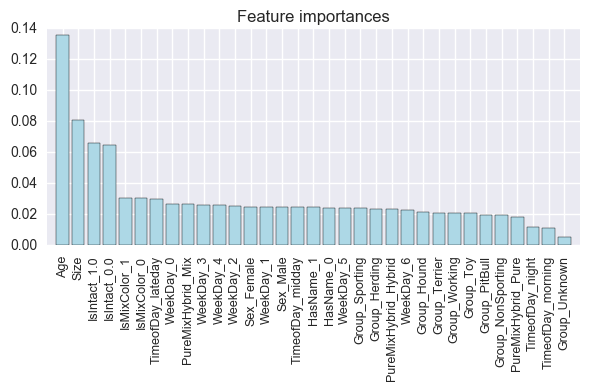

In [14]:
# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(train_data.shape[1]), 
        importances[indices],
        color="lightblue", 
        align="center")
#plt.xticks(range(train_data.shape[1]), feat_labels, rotation = 90,fontsize=9)
#plt.xticks(range(train_data.shape[1]), feat_labels[indices[f]], rotation = 90,fontsize=9)
plt.xticks(range(train_data.shape[1]), feat_labels[indices], rotation = 90,fontsize=9)
plt.xlim([-1, train_data.shape[1]])
#plt.show() 
plt.tight_layout(rect=[0,0,1,1], h_pad=0.0)
plt.savefig("RandomForest_Python_1.png")

In [15]:
#train_data.shape[1]

In [16]:
plt.close

<function matplotlib.pyplot.close>